# 1. 原始數據

In [34]:
# import os
# import pymysql
# import pandas as pd

# host = os.getenv('MYSQL_HOST')
# port = os.getenv('MYSQL_PORT')
# user = os.getenv('MYSQL_USER')
# password = os.getenv('MYSQL_PASSWORD')
# database = os.getenv('MYSQL_DATABASE')

# conn = pymysql.connect(
#     host=host,
#     port=int(3306),
#     user="root",
#     passwd=password,
#     db="[cocoa]",
#     charset='utf8mb4')

# df = pd.read_sql_query("SELECT * FROM YOUR_TABLE",
#     conn)
# df.tail(10)

In [116]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import time, datetime

plt.style.use('ggplot')
# plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.sans-serif'] = ['KaiTi']

plt.rcParams['axes.unicode_minus']=False


In [117]:
df = pd.read_csv('TC_data_1564_2021.csv', usecols=["訂單編號", "顧客姓名", "購買次數", "訂單日期", "訂單金額"])


# df.head()  # 前五筆
df

,訂單編號,顧客姓名,購買次數,訂單日期,訂單金額
0,402,吳建宜,10,2021/1/1,6076
1,654,王家傳,7,2021/1/1,6885
2,1214,陳煜棠,6,2021/1/1,3339
3,1262,吳秋燕,7,2021/1/1,2629
4,1500,陳世賢,9,2021/1/1,5266
...,...,...,...,...,...
1558,1161,陳世賢,4,2021/12/30,3249
1559,1376,傅偉茹,7,2021/12/30,3369
1560,1541,何讚美,5,2021/12/30,4287
1561,666,頂秋雯,7,2021/12/31,4237


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   訂單編號    1563 non-null   int64 
 1   顧客姓名    1563 non-null   object
 2   購買次數    1563 non-null   int64 
 3   訂單日期    1563 non-null   object
 4   訂單金額    1563 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 61.2+ KB


# 2. 數據清洗

In [119]:
# df.drop()刪除資料
# inplace=True 原始數據也會刪除資料
# df.drop(colums='', inplace=True)
# df.rename(colums={'':'', '':''}, inplace=True)

In [120]:
df.columns

Index(['訂單編號', '顧客姓名', '購買次數', '訂單日期', '訂單金額'], dtype='object')

## 2.1 檢查重複值

In [121]:
# df.duplicated()
df.duplicated().sum()

0

## 2.2 處理缺失值

In [122]:
# df.isnull()
df.isnull().sum()

訂單編號    0
顧客姓名    0
購買次數    0
訂單日期    0
訂單金額    0
dtype: int64

## 2.3 數據格式-標準化處理

In [123]:
df.訂單日期 = pd.to_datetime(df.訂單日期,format='%Y/%m/%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   訂單編號    1563 non-null   int64         
 1   顧客姓名    1563 non-null   object        
 2   購買次數    1563 non-null   int64         
 3   訂單日期    1563 non-null   datetime64[ns]
 4   訂單金額    1563 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 61.2+ KB


## 2.4 異常值處理

In [124]:
df[['購買次數' ,'訂單金額']].describe()

,購買次數,訂單金額
count,1563.000000,1563.000000
mean,7.655150,4338.795905
std,3.866128,1658.468860
min,1.000000,300.000000
25%,5.000000,3459.000000
50%,7.000000,4598.000000
75%,9.000000,5488.000000
max,25.000000,8316.000000


# 3. 分析階段

## 1. 消費情況按月分析
### 每月消費總金額趨勢分析

In [125]:
df['Month']=df.訂單日期.astype('datetime64[M]')
# df.head()
df

,訂單編號,顧客姓名,購買次數,訂單日期,訂單金額,Month
0,402,吳建宜,10,2021-01-01,6076,2021-01-01
1,654,王家傳,7,2021-01-01,6885,2021-01-01
2,1214,陳煜棠,6,2021-01-01,3339,2021-01-01
3,1262,吳秋燕,7,2021-01-01,2629,2021-01-01
4,1500,陳世賢,9,2021-01-01,5266,2021-01-01
...,...,...,...,...,...,...
1558,1161,陳世賢,4,2021-12-30,3249,2021-12-01
1559,1376,傅偉茹,7,2021-12-30,3369,2021-12-01
1560,1541,何讚美,5,2021-12-30,4287,2021-12-01
1561,666,頂秋雯,7,2021-12-31,4237,2021-12-01


In [126]:
grouped_month = df.groupby('Month')

In [127]:
grouped_month.訂單金額.sum()

Month
2021-01-01    734841
2021-02-01    595174
2021-03-01    509628
2021-04-01    489674
2021-05-01    625753
2021-06-01    506190
2021-07-01    601904
2021-08-01    572281
2021-09-01    479154
2021-10-01    517386
2021-11-01    552478
2021-12-01    597075
Name: 訂單金額, dtype: int64

### 每月訂單金額折線圖

<AxesSubplot:xlabel='Month'>

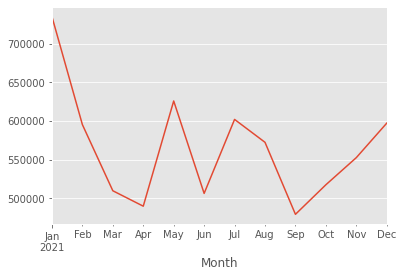

In [128]:
grouped_month.訂單金額.sum().plot()

### 每月訂單數量折線圖

<AxesSubplot:xlabel='Month'>

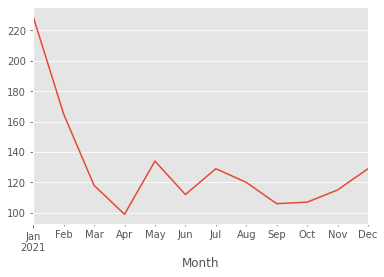

In [129]:
grouped_month.訂單編號.nunique().head(13).plot()

### 用戶分佈分析

<AxesSubplot:>

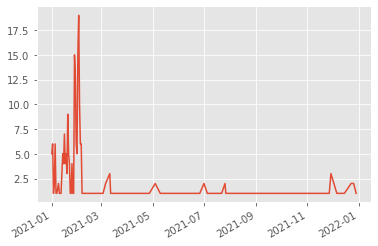

In [130]:
df.groupby('顧客姓名').訂單日期.min().value_counts().plot()

### 新用戶每月人數

<AxesSubplot:>

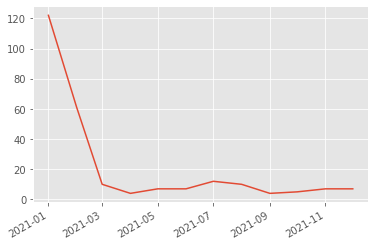

In [131]:
df.groupby('顧客姓名').Month.min().value_counts().plot()

# 4. 用戶分層分析

## RFM分層分析
### Recency（上次消費的日期）、Frequency（消費頻率）、Monetary（消費金額）
- Recency（上次消費的日期）近期有消費過的顧客，會是最有可能再次回購的人，因此可以針對這群人發放折價優惠或是商品訊息。
- Frequency（消費頻率）
消費頻率越高的人就越有可能是品牌的忠誠顧客，也因此可以透過行銷策略，持續提高這群人的購買意願。
- Monetary（消費金額）
消費金額的多寡過去常被視為較重要的要素，但是結合 Recency、Frequency 就會是一個完整的顧客消費輪廓。
未來若是要採用分眾行銷，RFM 模型就會是個參考依據。

In [132]:
pivot_rfm = df.pivot_table(index='顧客姓名',
                          values=['訂單日期', '購買次數', '訂單金額'],
                          aggfunc={'訂單日期':'max' , '購買次數':'nunique', '訂單金額':'sum'})

In [133]:
pivot_rfm['R'] = (pivot_rfm.訂單日期.max() - pivot_rfm.訂單日期)/np.timedelta64(1, 'D')
pivot_rfm.rename(columns={'購買次數':'F', '訂單金額':'M'}, inplace=True)

In [134]:
def label_func(df):
    label = df.apply(lambda x:'1' if x > 0 else '0')
    label = label.R + label.F + label.M
    labels = {
        '111':'111重要價值客戶important value',
        '011':'011重要保持客戶important keep',
        '101':'101重要發展客戶important develop',
        '001':'001重要挽留客戶important retain',
        '110':'110一般價值客戶generally value',
        '010':'010一般保持客戶generally keep',
        '100':'100一般發展客戶generally develop',
        '000':'000一般挽留客戶generally retain'
    }
    return labels[label]
pivot_rfm['label'] = pivot_rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(label_func, axis=1)

<AxesSubplot:>

/Users/yiting/opt/anaconda3/envs/py36_13/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yiting/opt/anaconda3/envs/py36_13/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 33324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yiting/opt/anaconda3/envs/py36_13/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30332 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yiting/opt/anaconda3/envs/py36_13/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23637 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yiting/opt/anaconda3/envs/py36_13/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23458 missing from current font.
  font.set_text(s, 0.0, flags=fl

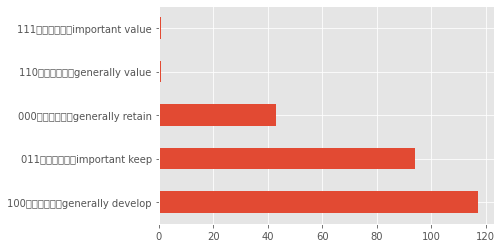

In [135]:
pivot_rfm.label.value_counts().plot.barh()

## 客戶分層消費金額占比

<AxesSubplot:ylabel='M'>

/Users/yiting/opt/anaconda3/envs/py36_13/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yiting/opt/anaconda3/envs/py36_13/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 33324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yiting/opt/anaconda3/envs/py36_13/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25405 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yiting/opt/anaconda3/envs/py36_13/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yiting/opt/anaconda3/envs/py36_13/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23458 missing from current font.
  font.set_text(s, 0.0, flags=fl

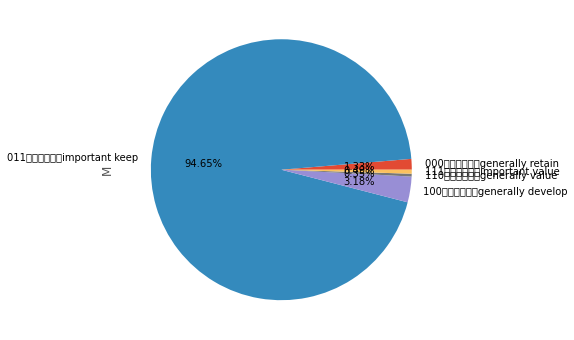

In [136]:
pivot_rfm.groupby('label').M.sum().plot.pie(figsize=(6,6), autopct='%3.2f%%')

In [137]:
pivot_rfm.groupby('label').agg(['sum','count'])

M          F              R      
                                sum count  sum count      sum count
label                                                              
000一般挽留客戶generally retain     90049    43   43    43   3640.0    43
011重要保持客戶important keep     6418913    94  738    94   2708.0    94
100一般發展客戶generally develop   215855   117  117   117  35698.0   117
110一般價值客戶generally value      23506     1    4     1    192.0     1
111重要價值客戶important value      33215     1    6     1    235.0     1

銷售額主要來源為重要發展客戶,人數佔比最高的為一般發展客戶

重要保持客戶:
重要價值客戶:
重要發展客戶:銷售額的主要來源,人數佔比次高,近期有消費,且消費高,消費頻率不足,可以適當舉行營銷活動,提升此層客戶的購買頻率
重要挽留客戶:銷售額次高,但頻次低目近期末消費,處在流失的邊緣,可以通過適當活動,使其參與到消費中來,防止流失
一般價值客戶:
一般發展客戶:人數佔比最高,近期有消費,但消費額以及消費頻次不高考慮到人教佔比高,可以話當舉辦活動提升消費頻次和消費額
一般保持客戶:
一般挽留客戶:在成本與資源控制下,酌情考慮

## 用戶狀態分層分析

In [138]:
pivoted_status = df.pivot_table(index='顧客姓名', columns='Month', values='訂單日期', aggfunc='count').fillna(0)

In [139]:
def active_status(df):
    status = []
    for i in range(len(df)):
        # 若本月沒消費
        if df[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        # 若本月有消費
        else:
            if len(status) > 0:
                if status[i-1] == 'unreg':
                    status.append('new')
                elif status[i-1] == 'unactive':
                    status.append('return')
                else:
                    status.append('active')
            else:
                status.append('new')
    status = pd.Series(status, index = df.index)
    return status

In [140]:
active_status = pivoted_status.apply(active_status, axis=1)

<AxesSubplot:xlabel='Month'>

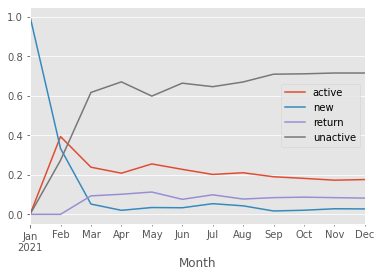

In [141]:
active_status.replace('unreg', np.nan).apply(lambda x:x.value_counts()).fillna(0).T.apply(lambda x:x/x.sum(),axis=1).plot()

- 新用戶(藍)：新用戶佔比呈明顯下降趨勢,說明拉新客戶行銷不足
- 活躍用戶(橘)：消費運營持續低落,說明消費營運持續下滑
- 不活躍用戶(灰)：不活躍用戶呈明顯上升趨勢,客戶流失較為明顯
- 回流客戶(紫)：消費運營持續低落,說明召回營運效果不佳